# Imports

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading files

In [3]:
df1 = pd.read_excel("datasets/Aracaju.xlsx")
df2 = pd.read_excel("datasets/Fortaleza.xlsx")
df3 = pd.read_excel("datasets/Natal.xlsx")
df4 = pd.read_excel("datasets/Recife.xlsx")
df5 = pd.read_excel("datasets/Salvador.xlsx")

## Concatenating the tables

In [4]:
df = pd.concat([df1, df2, df3, df4, df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde
66,Recife,2019-01-01,14.59,983,7
77,Natal,2019-04-01,426.00,853,3
132,Natal,2019-01-02,19.61,1036,2


# Data types

In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

## Change datatype

In [8]:
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Null data treatment

Null values

In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

How to fill null values when their exists\
```df["vendas"].fillna(df["vendas"].mean(), inplace=rue)```

How to drop rows with null values\
```df.dropna(inplace=True```\

How to drop na from a especific column\
```df.dropna(subset=["Vendas"], inplace=True)```\

how to drop rows with null values in all columns\
```df.dropna(how="all", inplace=True)```



# Create new columns

In [11]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


Biggest sells

In [12]:
df["Receita"].max()

3544.0

Minimum sells

In [13]:
df["Receita"].min()

3.34

nlargest()

In [14]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


nsmallest

In [15]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


Group by city and show sells

In [16]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

Ordering data

In [17]:
df.sort_values("Receita", ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


# Working with dates

Transforming date into integer

In [18]:
df["Data"] = df["Data"].astype("int64")

In [19]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

Transform integert into datetime

In [24]:
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

Grouping by year

In [25]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

Creating a new column with year

In [26]:
df["Ano_Venda"] = df["Data"].dt.year

In [27]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
75,Natal,2019-03-30,706.00,854,2,1412.00,2019
34,Recife,2019-01-01,24.97,980,5,124.85,2019
101,Aracaju,2018-01-01,16.62,1520,9,149.58,2018
69,Recife,2019-01-01,38.83,981,1,38.83,2019
52,Aracaju,2018-01-01,14.76,1520,3,44.28,2018


Extracting month and year

In [29]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
156,Natal,2019-01-02,36.14,1037,3,108.42,2019,1,2
212,Salvador,2019-01-02,50.73,1037,3,152.19,2019,1,2
36,Salvador,2019-01-01,9.67,1037,1,9.67,2019,1,1
73,Salvador,2019-01-01,8.39,1037,1,8.39,2019,1,1
176,Natal,2019-01-02,19.42,1035,3,58.26,2019,1,2


Take oldest date

In [31]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

Difference between date

In [32]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [33]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days
70,Natal,2019-02-14,743.00,854,4,2972.00,2019,2,14,409 days
87,Recife,2019-01-01,210.06,983,4,840.24,2019,1,1,365 days
226,Salvador,2019-01-02,38.32,1035,2,76.64,2019,1,2,366 days
186,Natal,2019-01-02,169.09,1036,2,338.18,2019,1,2,366 days


Create a column with quarter

In [34]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,2018,1,1,0 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
80,Recife,2019-01-01,114.14,982,8,913.12,2019,1,1,365 days,1
112,Aracaju,2018-01-01,4.52,1522,8,36.16,2018,1,1,0 days,1


Filter sells of march 2019

In [36]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [46]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
121,Salvador,2019-03-02,100.70,1037,3,302.10,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1
131,Fortaleza,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,434 days,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2,425 days,1


# Data Visualization

In [39]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

Bar Plot

<AxesSubplot:>

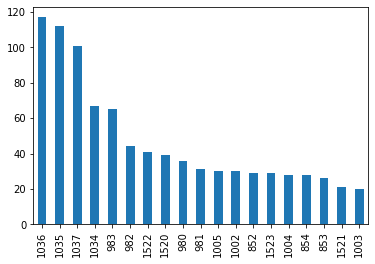

In [40]:
df["LojaID"].value_counts(ascending=False).plot.bar()

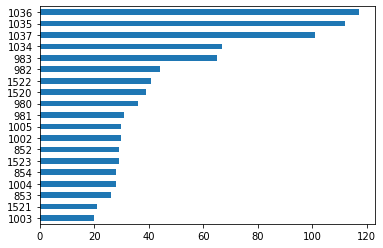

In [42]:
df["LojaID"].value_counts(ascending=True).plot.barh();

Pie Plot

<AxesSubplot:ylabel='Receita'>

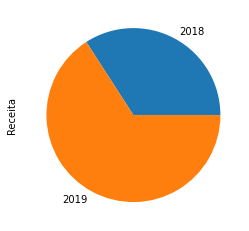

In [43]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [44]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Plot with title and change axis

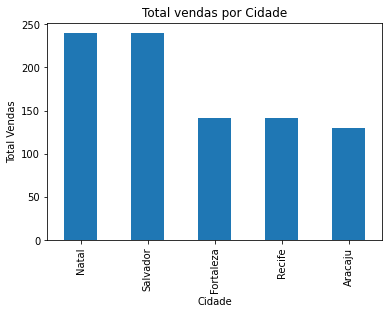

In [47]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Change color

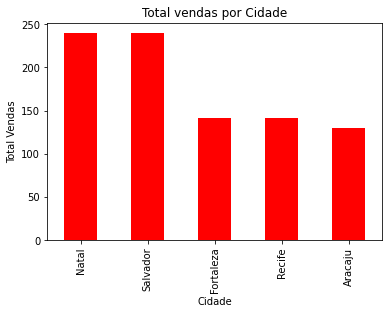

In [48]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Change style of plot

In [49]:
plt.style.use("dark_background")

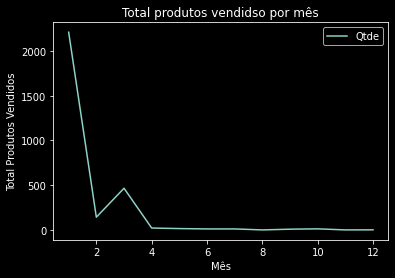

In [51]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidso por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [52]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

Select 2019 sells

In [54]:
df_2019 = df[df["Ano_Venda"] == 2019] 

Total produtos vendidos por mês

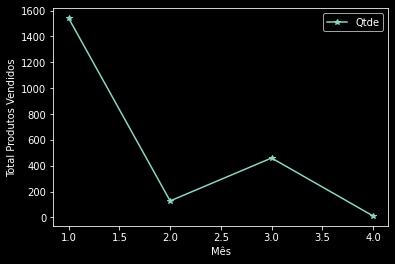

In [56]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

Histogram

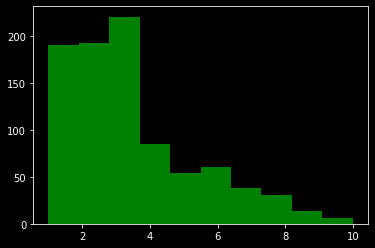

In [57]:
plt.hist(df["Qtde"], color="green");

Scatter Plot

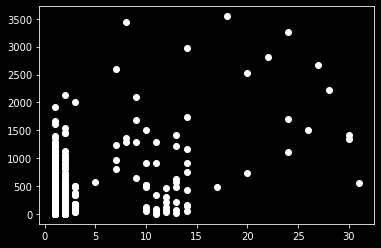

In [60]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"], color="white");

Saving plot in png file

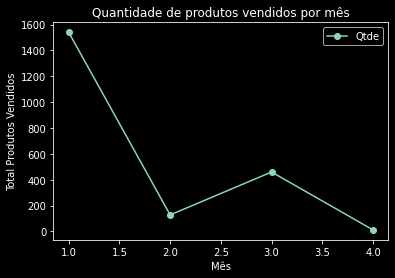

In [61]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker= "o")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Grafito QTDE x MES.png");